# Izziv: Analiza besedila o podatkovni znanosti

V tem primeru bomo izvedli preprosto vajo, ki zajema vse korake tradicionalnega procesa podatkovne znanosti. Kode ni treba pisati, preprosto kliknite na spodnje celice, da jih izvedete, in opazujte rezultat. Kot izziv pa vas spodbujamo, da to kodo preizkusite z različnimi podatki.

## Cilj

V tej lekciji smo razpravljali o različnih konceptih, povezanih s podatkovno znanostjo. Poskusimo odkriti več povezanih konceptov z uporabo **rudarjenja besedila**. Začeli bomo z besedilom o podatkovni znanosti, iz njega izluščili ključne besede in nato poskusili vizualizirati rezultat.

Kot besedilo bomo uporabili stran o podatkovni znanosti iz Wikipedije:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Korak 1: Pridobivanje podatkov

Prvi korak v vsakem procesu podatkovne znanosti je pridobivanje podatkov. Za to bomo uporabili knjižnico `requests`:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Korak 2: Pretvorba podatkov

Naslednji korak je pretvorba podatkov v obliko, primerno za obdelavo. V našem primeru smo prenesli izvorno kodo HTML s strani, zdaj pa jo moramo pretvoriti v navadno besedilo.

Obstaja veliko načinov, kako to doseči. Uporabili bomo najpreprostejši vgrajeni objekt [HTMLParser](https://docs.python.org/3/library/html.parser.html) iz Pythona. Potrebno je podrazrediti razred `HTMLParser` in definirati kodo, ki bo zbirala ves tekst znotraj HTML oznak, razen oznak `<script>` in `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Korak 3: Pridobivanje vpogledov

Najpomembnejši korak je, da naše podatke pretvorimo v obliko, iz katere lahko pridobimo vpoglede. V našem primeru želimo iz besedila izluščiti ključne besede in ugotoviti, katere ključne besede so bolj pomembne.

Uporabili bomo Python knjižnico, imenovano [RAKE](https://github.com/aneesha/RAKE) za ekstrakcijo ključnih besed. Najprej namestimo to knjižnico, če je še ni:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Glavna funkcionalnost je na voljo prek objekta `Rake`, ki ga lahko prilagodimo z nekaterimi parametri. V našem primeru bomo nastavili minimalno dolžino ključne besede na 5 znakov, minimalno pogostost ključne besede v dokumentu na 3 in največje število besed v ključni besedi na 2. Po želji lahko eksperimentirate z drugimi vrednostmi in opazujete rezultat.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Pridobili smo seznam izrazov skupaj z njihovo stopnjo pomembnosti. Kot lahko vidite, so najpomembnejše discipline, kot sta strojno učenje in veliki podatki, na seznamu uvrščene na najvišja mesta.

## Korak 4: Vizualizacija rezultata

Ljudje podatke najbolje razumejo v vizualni obliki. Zato pogosto smiselno vizualiziramo podatke, da pridobimo določene vpoglede. Za prikaz preproste porazdelitve ključnih besed z njihovo pomembnostjo lahko v Pythonu uporabimo knjižnico `matplotlib`:


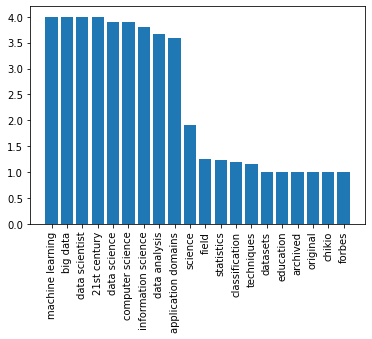

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Vendar pa obstaja še boljši način za vizualizacijo pogostosti besed - z uporabo **oblačka besed**. Za prikaz oblačka besed iz našega seznama ključnih besed bomo morali namestiti še eno knjižnico.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` objekt je odgovoren za sprejemanje bodisi izvirnega besedila ali vnaprej izračunanega seznama besed z njihovimi frekvencami in vrne sliko, ki jo je nato mogoče prikazati z uporabo `matplotlib`:


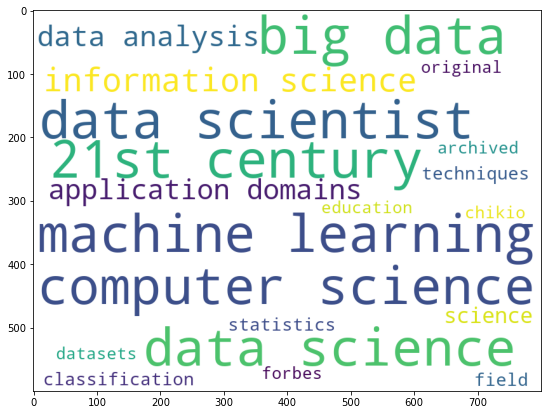

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Prvotno besedilo lahko posredujemo tudi v `WordCloud` - poglejmo, ali lahko dosežemo podoben rezultat:


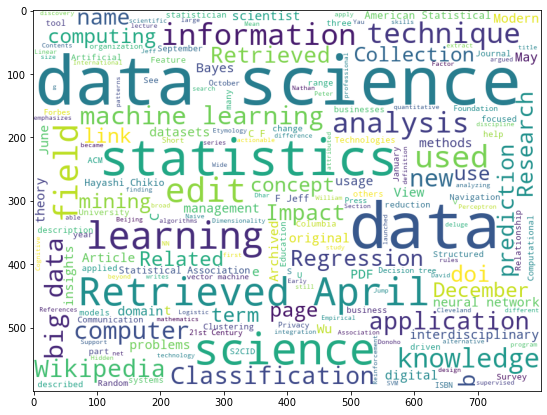

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Zdaj lahko vidite, da je besedni oblak videti bolj impresiven, vendar vsebuje tudi veliko šuma (npr. nepovezane besede, kot je `Retrieved on`). Prav tako dobimo manj ključnih besed, ki so sestavljene iz dveh besed, kot sta *data scientist* ali *computer science*. To je zato, ker algoritem RAKE veliko bolje izbere dobre ključne besede iz besedila. Ta primer ponazarja pomen predobdelave in čiščenja podatkov, saj nam jasna slika na koncu omogoča sprejemanje boljših odločitev.

V tej vaji smo šli skozi preprost proces pridobivanja pomena iz besedila na Wikipediji v obliki ključnih besed in besednega oblaka. Ta primer je precej preprost, vendar dobro prikazuje vse tipične korake, ki jih podatkovni znanstvenik opravi pri delu s podatki, od pridobivanja podatkov do vizualizacije.

Na našem tečaju bomo vse te korake podrobno obravnavali.



---

**Omejitev odgovornosti**:  
Ta dokument je bil preveden z uporabo storitve za prevajanje z umetno inteligenco [Co-op Translator](https://github.com/Azure/co-op-translator). Čeprav si prizadevamo za natančnost, vas prosimo, da upoštevate, da lahko avtomatizirani prevodi vsebujejo napake ali netočnosti. Izvirni dokument v njegovem maternem jeziku je treba obravnavati kot avtoritativni vir. Za ključne informacije priporočamo profesionalni človeški prevod. Ne prevzemamo odgovornosti za morebitna nesporazumevanja ali napačne razlage, ki bi nastale zaradi uporabe tega prevoda.
